<a href="https://colab.research.google.com/github/bmb319/estrogenprogesteroneHA5HT/blob/main/Estrogen_progesterone_histamine_serotonin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**## Modelling of E2/Progesterone & Histamine/Serotonin co-modulation

The model consists on the following differential terms and conditions which affect them: 

<b> dHA/dt (extracellular HA)
    
    + Basal HA
    - Progesterone decreases HA
    + Serotonin increases HA 
    + E2 increases HA
    
<b> d5HT/dt (extracellular 5-HT)
 
    + Basal 5-HT
    - HA decreases 5-HT
    
<b> dP/dt (extracellular Progesterone)
    
    + Basal Progesterone
    
<b> dE/dt (extracellular E2)
    
    + Basal E2
    - Progesterone decreases E
    - HA increases E

    (Cortisol lowers progesterone and increases histamine)
    
    Results are given in picograms per milliliter (pg/mL). Normal levels for estradiol are:

    30 to 400 pg/mL for premenopausal women (0.000110129 - 0.00146839 uM)

    0 to 30 pg/mL for postmenopausal women (0 - 0.000110129 uM)

    10 to 50 pg/mL for men (0.00003671 - 0.000183549 uM)
    
    In women with regular menstrual cycles, progesterone levels tend to stay below 0.89 ng/mL (0.0028302 uM) before rising to 1.8-24 ng/mL (0.005724 - 0.07632 uM) during ovulation and the luteal phase. 

    In women who are pregnant, progesterone levels can range from 11-44 ng/mL (0.03498 - 0.13992 uM) during the first trimester, and they continue to rise up to 214 ng/mL (0.68052 uM) before birth. 

    In women approaching menopause, progesterone levels can be sporadic depending on frequency of ovulation. During menopause, progesterone eventually falls below 0.20 ng/mL (0.000636 uM). 

In [ ]:
from scipy.integrate._ivp.common import validate_max_step
## FUNCTIONS

## Function of progesterone metabolism in cytosol by 5-alpha-reductase. 
def V5ared(b):
  # b is concentration of cytosolic progesterone, a is metabolite production in uM/min. 
  km =  1.93 #$
  vmax = 34.40 #$
  a = (vmax * b)/(km + b)
  return a

## Function of E2 <-> E1 (estrone) in cytosol by 17beta OH-dehydrogenase.
def V17betaHSD1(b, c):
  # b is concentration of E2, c is the concentration of E1. 
  km1 = 1 #$
  km2 = 3.5 #uM 
  vmax_f = 1 #$
  vmax_b = 1 #$
  a =  (vmax_f * b/km1 - vmax_b*c/km2)/(1 + b/km1 + c/km1)
  return a

## Function of E1 (estrone) -> E3 (estriol) in cytosol by P450 cytokines (enzymes). 
def VP450_3A5(b):
  # b is concentration of cytosolic estrone. a is product speed production in uM/min. 
  km =  1 #$
  vmax = 1 #$
  a = (vmax * b)/(km + b)
  return a

## Function of E1 (estrone) -> catecholestrogens production in cytosol by Catechol-O-methyltransferase (COMT)
def VCOMT(b):
  #b is concentration of cytosolic estrone. a is product speed production in uM/min. 
  km =  1 #$
  vmax = 1 #$
  a = (vmax * b)/(km + b)
  return a
## Function of cholesterol -> pregnenolone production by P450scc enzyme. 
def VP450scc (b):
  # b is concentration of cytosolic cholesterol. a is product speed production in uM/min. 
  km =  1 #$
  vmax = 1 #$
  a = (vmax * b)/(km + b)
  return a

## Function of pregnenolone -> progesterone production by 3-beta-HSD enzyme. 
def V3betaHSD(b):
  # b is concentration of cytosolic pregnenolone. a is product speed production in uM/min. 
  km =  1 #$
  vmax = 1 #$
  a = (vmax * b)/(km + b)
  return a

## Function of pregnenolone -> androstenedione production by CYP 17 enzyme. 
def VCYP17(b):
  # b is concentration of cytosolic pregnenolone. a is product speed production in uM/min. 
  km =  1 #$
  vmax = 1 #$
  a = (vmax * b)/(km + b)
  return a

## Function of androstenedione <-> testosterone in cytosol by 17beta OH-dehydrogenase.
def V17betaHSD2(b, c):
  # b is concentration of androstenedione, c is the concentration of testosterone. 
  km1 = 1 #$
  km2 = 3.5 #uM 
  vmax_f = 1 #$
  vmax_b = 1 #$
  a =  (vmax_f * b/km1 - vmax_b*c/km2)/(1 + b/km1 + c/km1)
  return a

##Function of androstenedione -> E1 (estrone) in cytosol by CYP19. 
def VCYP19_1(b):
  # b is concentration of cytosolic androstenedione. a is product speed production in uM/min. 
  km =  1 #$
  vmax = 1 #$
  a = (vmax * b)/(km + b)
  return a

##Function of testosterone -> E2 (estradiol) in cytosol by CYP19. 
def VCYP19_2(b):
  # b is concentration of cytosolic testosterone. a is product speed production in uM/min. 
  km =  1 #$
  vmax = 1 #$
  a = (vmax * b)/(km + b)
  return a


Text(0, 0.5, '5-HT concentration (uM)')

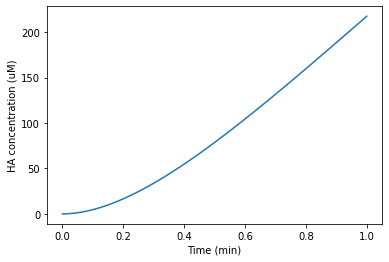

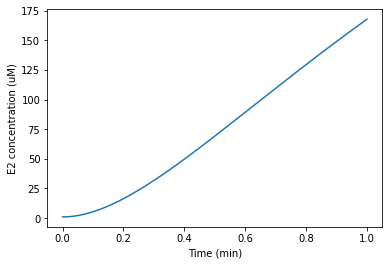

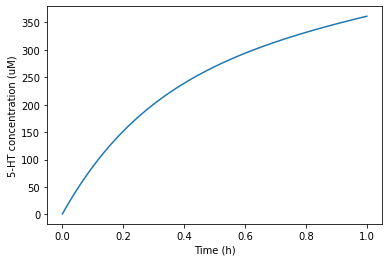

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math 

#work from here

def comp_model(z, t):
    # Constants. 
    k_pe = 1 #Constant of progesterone effect to E2. (uM)/min
    khaha = 1 #Constant of histamine effects on histamine.(uM)/min
    k5ht5ht = 1 #Constant of serotonin effects on serotonin. (uM)/min
    k_bp_ep = 1 #Constant of blood progesterone diffusion to extracellular progesterone. (uM)/min
    k_ep_removal = 1 #Constant of extracellular progesterone removal away from the synapse. (uM)/min
    k_ep_cp = 1 #Constant of diffusion of progesterone from extracellular space to cytosol. (uM)/min
    k_be2_ee2 = 1 #Constant of diffusion of blood E2 to extracellular E2. (uM)/min
    k_ee2_ce2 = 1 #Constant of diffusion of E2 from extracellular space to cytosol. (uM)/min
    k_ee2_removal = 1 #Constant of removal of extracellular E2 to somewhere else. 
    k_be1_ee1 = 1 #Constant of diffusion of blood E1 to extracellular E1. (uM)/min
    k_ee1_ce1 = 1 #Constant of diffusion of E1 from extracellular space to cytosol. uM/min
    k_ee1_removal = 1 #Constant of removal of extracellular E1 to somewhere else. 
    k_be3_ee3 = 1 #Constant of diffusion of E3 from blood to extracellular space. uM/min.
    k_ee3_ce3 = 1 #Constant of diffusion of E3 from extracellular space to cytosol. uM/min. 
    k_ee3_removal = 1 #Constant of removal of extracellular E3 to somewhere else. 
    k_bch_ech = 1 #Constant of diffusion of cholesterol from blood to extracellular space. uM/min.
    k_ech_cch = 1 #Constant of diffusion of cholesterol from extracellular space to cytosol. uM/min
    k_ch_removal = 1 #Constant of removal of extracellular cholesterol to somewhere else.
    k_bpreg_epreg = 1 #Constant of diffusion of pregnenolone from blood to extracellular space. uM/min.
    k_epreg_cpreg = 1 #Constant of diffusion of pregnenolone from extracellular space to cytosol. uM/min
    k_preg_removal = 1 #Constant of removal of extracellular pregnenolone to somewhere else.
    k_bandro_eandro = 1 #Constant of diffusion of androstenedione from blood to extracellular space. uM/min.
    k_eandro_candro = 1 #Constant of diffusion of androstenedione from extracellular space to cytosol. uM/min. 
    k_andro_removal = 1 #Constant of removal of extracellular androstenedione to somewhere else. uM/min. 
    k_btest_etest = 1 #Constant of diffusion of testosterone from blood to extracellular space. uM/min.
    k_etest_ctest = 1 #Constant of diffusion of testosterone from extracellular space to cytosol. uM/min. 
    k_test_removal = 1 #Constant of removal of extracellular testosterone to somewhere else. uM/min. 

    # z-initial conditions and variables of differential equations,t-
    
    #Concentration values. 
    bp = 1000 # Blood progesterone. uM $
    be2 = 1000 #Blood E2.  uM. $ 
    be1 = 1000 #Blood E1. uM. $ 
    be3 = 10 # Blood E3. uM. $
    bch = 100 #Blood cholesterol. uM $ 
    bpreg = 100 #Blood pregnenolone. uM $
    bandro = 100 #Blood androstenedione in uM. $ 
    btest = 100 #Blood testosterone in uM. $ 

    ce2 = z[0] #Cytosolic E2. $
    ee2 = z[1] #Extracellular E2. (250 pg/ml)
    ce1 = z[2] #Cytosolic E1. $
    ee1 = z[3] #Extracellular E1. (110 pg/ml)
    ce3 = z[4] #Extracellular E3. (9 pg/ml)
    ee3 = z[5] #Cytosolic E3. $
    cp = z[6] #Cytosolic progesterone in uM. $
    ep = z[7] # Extracellular progesterone in uM. $
    ech = z[8] # Extracellular cholesterol in uM. $ 
    cch = z[9] # Cytosolic cholesterol in uM. $ 
    epreg = z[10] # Extracellular pregnenolone in uM. $
    cpreg = z[11] # Cytosolic pregnenolone in uM. $
    eandro = z[12] #Extracellular androstenedione in uM. $
    candro = z[13] #Cytosolic androstenedione in uM. $
    etest = z[14] #Extracellular testosterone in uM. $
    ctest = z[15] #Cytosolic testosterone in uM. $




    #Equations
    dce2dt = k_pe*cp + k_ee2_ce2 * (ee2 - ce2) - V17betaHSD1(ce2, ce1) + VCYP19_2(ctest)

    dee2dt = k_be2_ee2 * (be2 - ee2) - k_ee2_ce2 * (ee2 - ce2) - k_ee2_removal * ee2

    dce1dt = k_ee1_ce1 * (ee1 - ce1) + V17betaHSD1(ce2, ce1) - VP450_3A5(ce1) - VCOMT(ce3) + VCYP19_1(candro)

    dee1dt = k_be1_ee1 * (be1 - ee1) - k_ee1_ce1 * (ee1 - ce1) - k_ee1_removal * ee1

    dce3dt = k_ee3_ce3 * (ee3 - ce3) + VP450_3A5(ce1) 

    dee3dt = k_be3_ee3 * (be3 - ee3) - k_ee3_ce3 * (ee3 - ce3) - k_ee3_removal * ee3

    dcpdt = k_ep_cp * (ep - cp) - V5ared(cp) + V3betaHSD(cpreg)

    depdt = k_bp_ep * (bp - ep) - k_ep_cp * (ep - cp) - k_ep_removal * ep

    dechdt = k_bch_ech * (bch - ech) - k_ech_cch * (ech - cch) - k_ch_removal * ech

    dcchdt = k_ech_cch * (ech - cch) - VP450scc(cch)

    depregdt = k_bpreg_epreg * (bpreg - epreg) - k_epreg_cpreg * (epreg - cpreg) - k_preg_removal * epreg

    dcpregdt = k_epreg_cpreg * (epreg - cpreg) + VP450scc(cch) - V3betaHSD(cpreg)

    deandrodt = k_bandro_eandro * (bandro - eandro) - k_eandro_candro * (eandro - candro) - k_andro_removal * eandro

    dcandrodt = k_eandro_candro * (eandro - candro) + VCYP17(cpreg) - V17betaHSD2(candro, ctest) - VCYP19_1(candro)

    detestdt = k_btest_etest * (btest - etest) - k_etest_ctest * (etest - ctest) - k_test_removal * etest

    dctestdt = k_etest_ctest * (etest - ctest) + V17betaHSD2(candro, ctest) - VCYP19_2(ctest)



    ## Histamine model. 
    












    return [dce2dt, dee2dt, dce1dt, dee1dt, dce3dt, dee3dt, dcpdt, depdt, dechdt, dcchdt, depregdt, dcpregdt, deandrodt, dcandrodt, detestdt, dctestdt]

#the equations model the differential terms of this model, calculate how much these variables are going to change in each iterations
#find the ks that give the diff eq to 0

#Time array.
time = np.linspace(0, 1, 3000) # Time in min. 
#Initial conditions
z0 = [0.00073, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] #value at time zero SUBSTITUTE THE 1's. 
#Constant parameters for steady state
 
#buscar valores que tengan sentido y evidentemente sea positive


#Get solution of the differential equation.
x = odeint(comp_model, z0, time) #shows how the steady state values have changed over time

cha = x[:,0]
c5ht = x[:,1]
ce = x[:,2]
#plt.figure()
#plt.plot(cp)
#plt.xlabel('Time (min)')
#plt.ylabel('Progesterone concentration (uM)')
#plt.ylim(50,150)
plt.figure()
plt.plot(time, cha)
plt.xlabel('Time (min)')
plt.ylabel('HA concentration (uM)')
#plt.ylim(1500,2500)
plt.figure()
plt.plot(time, ce)
#plt.ylim(30,90)
plt.xlabel('Time (min)')
plt.ylabel('E2 concentration (uM)')




plt.figure()
plt.plot(time, c5ht)
plt.xlabel('Time (h)')
plt.ylabel('5-HT concentration (uM)')

**Next Steps: **

1. How progesterone affects estrogen. 

2. Does estrogen affect progesterone. 

3. Start defining histamine dynamics.

3. Look how progesterone affects serotonin and histamine. 
